In [1]:
include("src/JuliaPhonons.jl")
using JuliaPhonons
using PyPlot

In [2]:
# note that the results from the iodine interstitial in MAPI at PBEsol level of theory dont make great sense
# as the negative was not relaxed from the neutral case.
# this has been fixed for HSE06 but I have not done the phonons yet...


poscar_neutral = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/neutral_POSCAR"))
poscar_negative = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/negative_POSCAR"))
poscar_perfect = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/perfect_POSCAR"))
phonons_neutral = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/neutral_mesh.yaml"),poscar_neutral)
phonons_negative = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/negative_mesh.yaml"),poscar_negative)
phonons_perfect = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/perfect_mesh.yaml"),poscar_perfect)


[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N", "N", "N", "N", "N", "N", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I"]
supercellexpansions ==>Array{Float64,1}[[0.0, 0.0, 0.0]]
[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N

(Any[[0.0909134 0.104155 0.00862495; 0.0983182 0.112363 0.0100874; … ; 0.296444 0.337899 0.0287834; 0.301282 0.337792 0.0266648], [0.103906 -0.0888006 -0.0298532; 0.112019 -0.0958573 -0.0318454; … ; 0.33584 -0.288231 -0.0965737; 0.333316 -0.287944 -0.101759], [0.0177765 -0.0265022 0.134911; 0.0189084 -0.02859 0.146352; … ; 0.0576788 -0.0859989 0.440055; 0.0569092 -0.0859566 0.44134], [0.00139734 -0.096189 8.25423e-5; 0.00135372 -0.153166 0.000269111; … ; 0.0016166 -0.0904076 0.0011816; -0.0013526 0.851741 -0.00128379], [0.101602 0.00156059 0.0633646; 0.090599 0.000544892 0.116293; … ; 0.296459 0.00428477 0.4966; -0.16475 -0.00294152 -0.569291], [0.0164859 -0.00238063 0.0358293; 0.0125822 -0.00192689 0.0524691; … ; 0.72516 0.00516873 -0.0579192; -0.081074 -0.00290181 0.464587], [0.00133076 -0.202322 -0.00373144; 0.0010399 -0.202927 -0.00348954; … ; -0.0113752 0.253608 -0.00858101; -0.0004269 -0.249335 -0.000658783], [0.0905063 0.0040615 -0.0868587; 0.117656 0.00373707 -0.139297; … ; -0.

In [3]:
displacement =  poscar_neutral.positions.-poscar_negative.positions 

# check to see if any that shifted more than half a unit cell - in this case it is more likely 
# that moved into a neighbouring cell.
# I have been careful to define this so that if the start and end points are interchanged the displacement stays the same.
for i = 1:size(displacement,2)
    for j = 1:size(displacement,1)
        if (displacement[j,i]) > 0.5
            displacement[j,i] = 1-(displacement[j,i])
            
        end
        if (displacement[j,i]) < -0.5
            displacement[j,i] = -1-(displacement[j,i])
            
        end
    end
end


In [4]:
# scalar projection https://en.wikipedia.org/wiki/Dot_product
# abs or no?
projections = []
for eigenvector in phonons_negative[1]   # projecting onto negative as these are stable imaginary in neutral phonon :(
    push!(projections,abs(dot(displacement,eigenvector)))
end

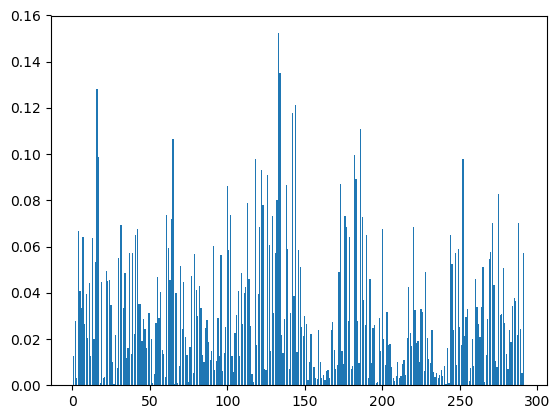

(PyObject <matplotlib.patches.Rectangle object at 0x13002dc90>, PyObject <matplotlib.patches.Rectangle object at 0x13002da10>, PyObject <matplotlib.patches.Rectangle object at 0x13002df90>, PyObject <matplotlib.patches.Rectangle object at 0x130a8d410>, PyObject <matplotlib.patches.Rectangle object at 0x130a8d750>, PyObject <matplotlib.patches.Rectangle object at 0x130a8dad0>, PyObject <matplotlib.patches.Rectangle object at 0x130a8de50>, PyObject <matplotlib.patches.Rectangle object at 0x130a9b210>, PyObject <matplotlib.patches.Rectangle object at 0x130a9b590>, PyObject <matplotlib.patches.Rectangle object at 0x130a9b910>, PyObject <matplotlib.patches.Rectangle object at 0x130a9bc90>, PyObject <matplotlib.patches.Rectangle object at 0x130a9bf90>, PyObject <matplotlib.patches.Rectangle object at 0x130aa73d0>, PyObject <matplotlib.patches.Rectangle object at 0x130aa7750>, PyObject <matplotlib.patches.Rectangle object at 0x130aa7ad0>, PyObject <matplotlib.patches.Rectangle object at 0x130

In [5]:
PyPlot.bar(1:3*poscar_negative.natoms,projections)

In [6]:
# Not sure if this should be abs or not. Gives the phonon modes which contribute to the distortion.
# Perhaps  abs: num modes = num_atoms * 3 (for each dimension) 
# could be used to analyse (with three-phonon phase space) how efficiently heat will propagate away
for (i,item) in enumerate(projections)
 if abs(item) > 0.1
        println(i)
    end
    end

16
65
133
134
142
144
186


In [7]:
# see "MAPI_iodine_defect_phonons.ipynb" and "MAPI_iodine_defect_stacked_barchart" for more analysis (in Python...)
# but this should be built into Julia workflow
mode_num = 16
mode_data = JuliaPhonons.decompose_eigenmode_atom_contributions(poscar_negative,phonons_negative[2][mode_num],phonons_negative[1][mode_num])

Normalising sum (Energy): 6.030733413925918 Normalising sum (Displacement): 1.4106454452426767
Mode: 0.672960516 Atom: 1 C	 EnergyFraction: 0.01815230965031829	 DisplacementFraction: 0.022393018958702077	 PR-E: 0.011984061934842681
Mode: 0.672960516 Atom: 2 C	 EnergyFraction: 0.013321838445659874	 DisplacementFraction: 0.016434061925182996	 PR-E: 0.0064545889103237615
Mode: 0.672960516 Atom: 3 C	 EnergyFraction: 0.017971238403993967	 DisplacementFraction: 0.02216964617970448	 PR-E: 0.011746169761932742
Mode: 0.672960516 Atom: 4 C	 EnergyFraction: 0.013421016105359174	 DisplacementFraction: 0.01655640928795439	 PR-E: 0.006551052158230249
Mode: 0.672960516 Atom: 5 C	 EnergyFraction: 0.0030177782138580598	 DisplacementFraction: 0.0037227860287683385	 PR-E: 0.00033121873946994365
Mode: 0.672960516 Atom: 6 C	 EnergyFraction: 0.0036983327571908815	 DisplacementFraction: 0.004562330477097838	 PR-E: 0.0004974532018713065
Mode: 0.672960516 Atom: 7 C	 EnergyFraction: 0.0034954065103059793	 Displ

Mode: 0.672960516 Atom: 73 I	 EnergyFraction: 0.03924130285195717	 DisplacementFraction: 0.014892405984425055	 PR-E: 0.05600503824274096
Mode: 0.672960516 Atom: 74 I	 EnergyFraction: 0.009642973419691848	 DisplacementFraction: 0.0036595898868303804	 PR-E: 0.0033819112116216642
Mode: 0.672960516 Atom: 75 I	 EnergyFraction: 0.02014364760841991	 DisplacementFraction: 0.007644684462274936	 PR-E: 0.014757625758828432
Mode: 0.672960516 Atom: 76 I	 EnergyFraction: 0.028010715692278462	 DisplacementFraction: 0.010630303269426522	 PR-E: 0.028535709367974164
Mode: 0.672960516 Atom: 77 I	 EnergyFraction: 0.0051148947713400145	 DisplacementFraction: 0.0019411457817744015	 PR-E: 0.0009515106837315221
Mode: 0.672960516 Atom: 78 I	 EnergyFraction: 0.003098437231694291	 DisplacementFraction: 0.0011758831083088785	 PR-E: 0.00034916095076287397
Mode: 0.672960516 Atom: 79 I	 EnergyFraction: 0.0020765057362595197	 DisplacementFraction: 0.0007880514714312517	 PR-E: 0.00015682183543475666
Mode: 0.672960516 

In [8]:
# idea for the distribution function from https://aip.scitation.org/doi/pdf/10.1063/1.4984833?class=pdf
# it projects a mode onto the basis set of another charge state or the perfect cell.
# if it is broad across perfect cell modes --> it is a localised state, as it cannot be well described by the delocalised modes of perfect cell

distribution_function = []
for neut_mode in phonons_neutral[1]
    for neg_mode in phonons_negative[1]
    push!(distribution_function,(dot(neut_mode,neg_mode)^2))
    end
end

distribution_function = reshape(distribution_function,3*poscar_negative.natoms,3*poscar_neutral.natoms)

291×291 Array{Any,2}:
 2.67578e-7   0.364643     6.49538e-5   …  7.14937e-11  1.65079e-12
 9.24254e-9   0.46886      0.267407        8.72513e-11  3.14329e-10
 3.61811e-8   0.166485     0.732525        6.77958e-12  5.52118e-11
 0.0292077    6.69461e-7   1.50492e-9      4.05006e-7   0.00016245 
 0.0109813    8.41929e-7   8.08201e-7      4.36769e-5   2.4063e-7  
 0.00219297   2.42571e-7   8.77881e-7   …  8.37067e-6   1.8654e-5  
 0.00884892   6.65466e-7   6.48152e-9      1.41476e-5   2.29365e-5 
 0.00506396   3.6485e-8    5.70195e-11     2.86278e-5   6.83268e-5 
 0.010684     7.33569e-9   8.17341e-9      2.84863e-5   1.5066e-7  
 0.000399789  2.45739e-10  4.78504e-8      8.68955e-6   3.40406e-7 
 5.99814e-5   1.18147e-8   1.07367e-7   …  4.62962e-6   4.18371e-6 
 9.1087e-5    4.04304e-7   5.29486e-8      1.37814e-5   3.77568e-6 
 9.23825e-7   3.50915e-11  1.37067e-8      2.9603e-6    2.09921e-5 
 ⋮                                      ⋱               ⋮          
 5.40418e-8   9.68842e-12 

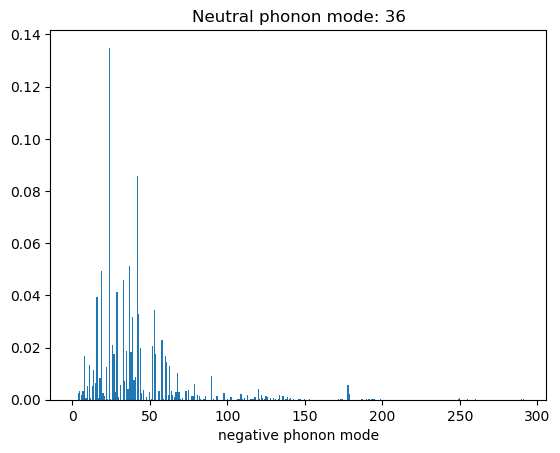

24

In [9]:
## this tells us which modes have shifted up or down in energy

i=36

PyPlot.bar(1:3*poscar_negative.natoms,distribution_function[:,i])
PyPlot.xlabel("negative phonon mode")
PyPlot.title(string("Neutral phonon mode: ",i))

indmax(distribution_function[:,i])

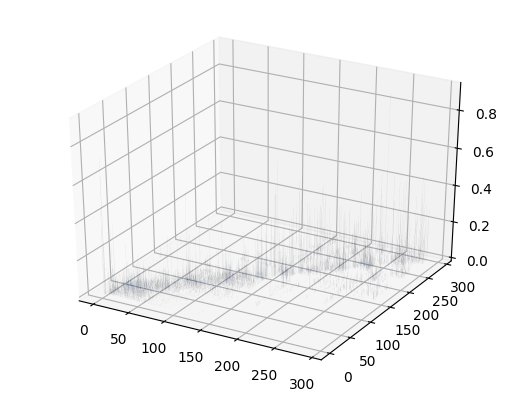

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x246135518>

In [146]:
# Plot in 3D
# not much documentation, this prob most useful: https://matplotlib.org/gallery/mplot3d/3d_bars.html
# Note that arrays should not be Any type as Python does not like

A=zeros(3*poscar_neutral.natoms,3*poscar_neutral.natoms)
B=zeros(3*poscar_neutral.natoms,3*poscar_neutral.natoms)
for i in 1:3*poscar_neutral.natoms
A[i,:] = i
B[:,i] = i
end

y=collect(Iterators.flatten(A))
x=collect(Iterators.flatten(B))
bottom=fill(0,3*poscar_neutral.natoms*3*poscar_neutral.natoms)
width=0.01
depth=0.01
top=convert(Array{Float64,1}, collect(Iterators.flatten(distribution_function)))


PyPlot.bar3D(x,y,bottom,width,depth,top)

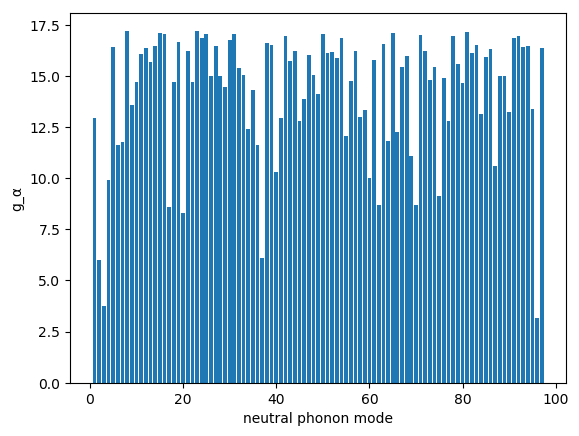

PyObject Text(24,0.5,u'g_\u03b1')

In [10]:
# the cutoff here seems a little bit arbitrary; am I inerpreting the appraoch in Gao et al correctly? - Hmmm, no!
# the localised modes are the ones with a small g-value

g = []
for i in 1:poscar_neutral.natoms
    # lots going on here. First filter so anything less than 0.05, the cutoff, is not included. Then find the minimum and take reciprocal.
    push!(g,maximum(1 ./ minimum(distribution_function[:,i][distribution_function[:,i] .> 0.058])))
    end
PyPlot.bar(collect(1:poscar_neutral.natoms),convert(Array{Float64,1},g))
PyPlot.xlabel("neutral phonon mode")
PyPlot.ylabel("g_α")


In [65]:
## distribution function for dot product with perfect 

num_unit_cells=8
defect_index = [2,3]
defect_type = "interstitial"
if defect_type == "interstitial"
num_atoms_expanded = (poscar_perfect.natoms*num_unit_cells)+length(defect_index)
    elseif defect_type == "vacancy"
        num_atoms_expanded = (poscar_perfect.natoms*num_unit_cells)-length(defect_index)
end
# build perfect basis set of same dimension as defect supercell basis set
# can re-factor this so it is quicker (and easier to read), a WIP - output is confirmed sane though.
expanded_basis_set = Array{Any,1}(3*num_atoms_expanded) # initialise expanded basis set
index_basis=1
# iterate in reverse to maintain correct position of defectww
for index_eigenvector in reverse(1:(3*num_atoms_expanded)) # repeat for every eigenvector in perfect basis
    expanded_eigenvector = Array{Float64,2}(num_atoms_expanded,3) # initialise expanded eigenvector
    index_expanded_eigenvector=num_atoms_expanded
    for atom_num in reverse(1:(num_atoms_expanded)) # for every element in eigenvector
        # need to insert zero-valued eigenvector elements where the interstitial defect is, and remove eigenvector elements when atom removed
        println("te")
        if atom_num in defect_index && defect_type=="interstitial"
            expanded_eigenvector[atom_num,:]=[0,0,0]
            index_expanded_eigenvector -= 1
#        elseif atom_num not in defect_index && defect_type=="vacancy"
#            break
        else
            println("t")
            for _ in 1:num_unit_cells # repeat that element by the number of unit cells
               expanded_eigenvector[index_expanded_eigenvector,:]=[0,0,0]#phonons_perfect[1][index_eigenvector][atom_num,:] 
               index_expanded_eigenvector -= 1
            end
        end 
    end
    for _ in 1:num_unit_cells   # repeat this eigenvector by the number of unit cells
#       expanded_basis_set[index_basis]=expanded_eigenvector
       index_basis += 1
    end
end



te
t
te
t
te
t
te
t
te
t
te
t
te
t
te
t
te
t
te
t
te
t
te
t
te
t


LoadError: [91mBoundsError: attempt to access 98×3 Array{Float64,2} at index [0, Base.Slice(Base.OneTo(3))][39m

In [62]:
expanded_eigenvector

LoadError: [91mUndefVarError: expanded_eigenvector not defined[39m

In [11]:


num_unit_cells=8
# build perfect basis set of same dimension as defect supercell basis set
# can re-factor this so it is quicker (and easier to read), a WIP - output is confirmed sane though.
expanded_basis_set = Array{Any,1}(3*poscar_perfect.natoms*num_unit_cells) # initialise expanded basis set
index_basis=1
for index_eigenvector in 1:(3*poscar_perfect.natoms)  # repeat for every eigenvector in perfect basis
    expanded_eigenvector = Array{Float64,2}(poscar_perfect.natoms*num_unit_cells,3) # initialise expanded eigenvector
    index_expanded_eigenvector=1
    for atom_num in 1:(poscar_perfect.natoms) # for every element in eigenvector
        for _ in 1:num_unit_cells # repeat that element by the number of unit cells
               expanded_eigenvector[index_expanded_eigenvector,:]=phonons_perfect[1][index_eigenvector][atom_num,:] 
               index_expanded_eigenvector += 1
        end 
    end
    for _ in 1:num_unit_cells   # repeat this eigenvector by the number of unit cells
       expanded_basis_set[index_basis]=expanded_eigenvector
       index_basis += 1
    end
end




# current implementation is HACKY. Julia is column major, so I should change data structure to reflect this. Should not be trying to add and remove rows...
# right now, can't do defect insert and remove as need to be clever about doing both from highest to lowest combined...
defect_insert = [3,2]
defect_remove = []
for (index,eigenvector) in enumerate(expanded_basis_set)
# first we need to transpose then flatten the eigenvector
    eigenvector_flat = collect(Iterators.flatten(transpose(expanded_basis_set[index,:])))
    for insert_index in Iterators.reverse(defect_insert)
        for _ in 1:3
            insert!(eigenvector_flat,3*insert_index-2,0)
            end
        end
    for remove_index in Iterators.reverse(defect_remove)
        for _ in 1:3
            splice!(eigenvector_flat,3*remove_index-2)
            end
        end
    
    updated_eigenvector=transpose(reshape(eigenvector_flat,3,poscar_perfect.natoms*num_unit_cells+length(defect_insert)-length(defect_remove)))
    expanded_basis_set[index] = updated_eigenvector  
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


98×3 Array{Any,2}:
 0.0909134  0.104155  0.00862495
 0          0         0         
 0          0         0         
 0.0909134  0.104155  0.00862495
 0.0909134  0.104155  0.00862495
 0.0909134  0.104155  0.00862495
 0.0909134  0.104155  0.00862495
 0.0909134  0.104155  0.00862495
 0.0909134  0.104155  0.00862495
 0.0909134  0.104155  0.00862495
 0.0983182  0.112363  0.0100874 
 0.0983182  0.112363  0.0100874 
 0.0983182  0.112363  0.0100874 
 ⋮                              
 0.296444   0.337899  0.0287834 
 0.296444   0.337899  0.0287834 
 0.296444   0.337899  0.0287834 
 0.296444   0.337899  0.0287834 
 0.301282   0.337792  0.0266648 
 0.301282   0.337792  0.0266648 
 0.301282   0.337792  0.0266648 
 0.301282   0.337792  0.0266648 
 0.301282   0.337792  0.0266648 
 0.301282   0.337792  0.0266648 
 0.301282   0.337792  0.0266648 
 0.301282   0.337792  0.0266648 

In [114]:
expanded_basis_set

288-element Array{Any,1}:
 Any[0.0909134 0.104155 0.00862495; 0 0 0; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]              
 Any[0.0909134 0.104155 0.00862495; 0 0 0; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]              
 Any[0.0909134 0.104155 0.00862495; 0 0 0; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]              
 Any[0.0909134 0.104155 0.00862495; 0 0 0; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]              
 Any[0.0909134 0.104155 0.00862495; 0 0 0; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]              
 Any[0.0909134 0.104155 0.00862495; 0 0 0; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]              
 Any[0.0909134 0.104155 0.00862495; 0 0 0; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]              
 Any[0.0909134 0.104155 0.00862495; 0 0 0; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]              
 Any[0.103906 -0.08880

In [98]:
for [3] in [3]
    println(index)
end

LoadError: [91msyntax: invalid assignment location "[3]"[39m

In [34]:
expanded_basis_set[2,:]

1-element Array{Any,1}:
 [0.0909134 0.104155 0.00862495; 0.0909134 0.104155 0.00862495; … ; 0.301282 0.337792 0.0266648; 0.301282 0.337792 0.0266648]

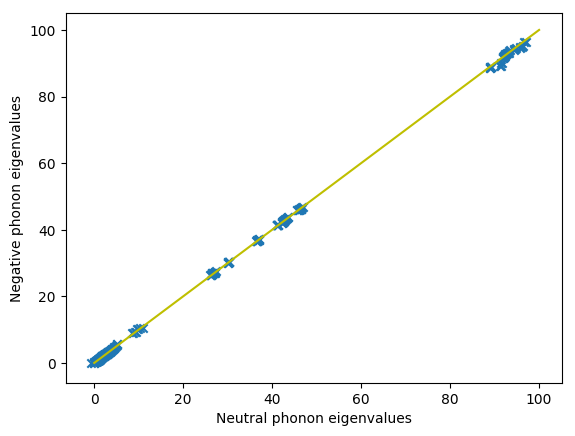

PyObject Text(24,0.5,'Negative phonon eigenvalues')

In [215]:
## simple comparison - how the eigenvalues have been perturbed by change in charge state

PyPlot.plot([0,100],[0,100],color="y")
PyPlot.scatter(phonons_neutral[2],phonons_negative[2],marker="x")
PyPlot.xlabel("Neutral phonon eigenvalues")
PyPlot.ylabel("Negative phonon eigenvalues")